# 📍Linear Regression
'모두를 위한 딥러닝2'의 'Lab02 Linear Regression'을 듣고 정리한 코드입니다.
  
* 강의 링크: https://www.youtube.com/watch?v=kyjBMuNM1DI&list=PLQ28Nx3M4JrhkqBVIXg-i5_CVVoS1UzAv&index=4
* 블로그 링크: https://gaga.tistory.com/204

## Data Definition
What would be the grade if I study 4 hours?

In [2]:
import torch

In [3]:
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[2], [4], [6]])

## Hypothesis
머신 러닝에서 식을 세울 때 이 식을 가설이라고 한다.
보통 머신 러닝에서 가설은 임의로 추측해서 세워보는 식일 수도 있고, 경험적으로 알고 있는 식일 수도 있다.
그리고 맞는 가설이 아니라고 판단되면 계속 수정해나기기도 한다.
  
  
선형 회귀의 가설은 다음과 같다.
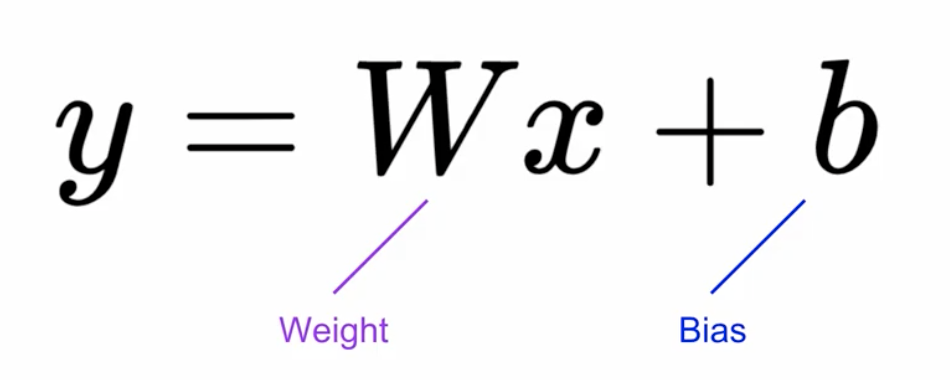

* Weight와 Bias를 0으로 초기화 (항상 출력 0을 예측)
* requires_grad = True, 학습을 통해 값이 변경되는 변수 임을 명시

In [4]:
W = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)
hypothesis = x_train * W + b

## Compute Loss
### Mean Squared Error (MSE, 평균 제곱 오차)
오차 제곱합에 대한 평균
  
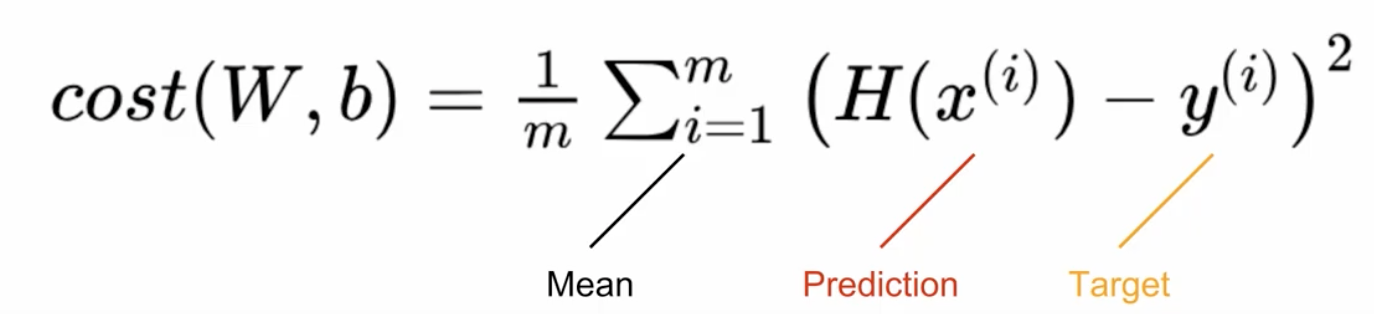

In [5]:
cost = torch.mean((hypothesis - y_train) ** 2)

### Gradient Descent
비용 함수가 최소가 되도록 만드는 W와 b를 구하기 위해서 Optimizer가 사용된다.
이를 최적화 알고리즘이라고도 부른다. 
이 옵티마지어 알고리즘을 이용해 적절한 W와 b를 구하는 과정을 머신 러닝에서는 training이라고 부른다.
**가장 기본적인 옵티마이저 알고리즘은 경사 하강법(Gradient Descent)이다.**
  
  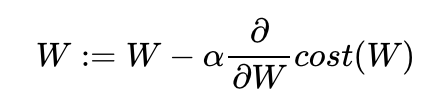
  
* zero_grad()로 gradient 초기화
* backward()로 gradient 계산  
cost.backward()를 호출하면 가중치 W와 편향 b에 대한 기울기가 계산
* step()으로 개선  
learning rate를 곱하여 W에서 빼준다

In [7]:
optimizer = torch.optim.SGD([W, b], lr=0.01)

optimizer.zero_grad()
cost.backward()
optimizer.step()

## Full Training Code
1. Hypothesis 에측
2. Cost 계산
3. Optimizer로 학습

In [8]:
nb_epochs = 1000

for epoch in range(1, nb_epochs + 1):
    hypothesis = x_train * W + b
    cost = torch.mean((hypothesis - y_train) ** 2)
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

### optimizer.zero_grad()가 필요한 이유
PyTorch는 미분을 통해 얻은 기울기를 이전에 계산된 기울기 값에 누적시키는 특징이 있다. 그래서 항상 backpropagation을 하기 전에 gradients를 zero로 만들어주고 시작해야 한다.

In [9]:
import torch
w = torch.tensor(2.0, requires_grad=True)
nb_epochs = 20

for epoch in range(nb_epochs + 1):
    z = 2 * w
    z.backward()
    print('수식을 w로 미분한 값: {}'.format(w.grad))

수식을 w로 미분한 값: 2.0
수식을 w로 미분한 값: 4.0
수식을 w로 미분한 값: 6.0
수식을 w로 미분한 값: 8.0
수식을 w로 미분한 값: 10.0
수식을 w로 미분한 값: 12.0
수식을 w로 미분한 값: 14.0
수식을 w로 미분한 값: 16.0
수식을 w로 미분한 값: 18.0
수식을 w로 미분한 값: 20.0
수식을 w로 미분한 값: 22.0
수식을 w로 미분한 값: 24.0
수식을 w로 미분한 값: 26.0
수식을 w로 미분한 값: 28.0
수식을 w로 미분한 값: 30.0
수식을 w로 미분한 값: 32.0
수식을 w로 미분한 값: 34.0
수식을 w로 미분한 값: 36.0
수식을 w로 미분한 값: 38.0
수식을 w로 미분한 값: 40.0
수식을 w로 미분한 값: 42.0
